In [7]:
# =================================================================
# Diabetes Health Data Analysis
# Project: Python Copanoion to SQL Analysis
# =================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [ ]:
## Data Cleaning and Preparation 
This section covers initail data loading, cleaning, and basic preprocessing required for analysis.

In [8]:
#Load dataset 
file_path =r"C:\Users\Nono Nsele\Documents\Data_Analysis_Projects\Diabetes_Health_Data_Analysis_Python\data\diabetes.csv"
df=pd.read_csv(file_path)

# Preview first 5 rows 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
df.shape

(768, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
cols_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
df_clean = df.copy()
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
## Feature Engineering 

New clinically meaningful features were created by categorizing continous variables such Glucose, BMI, and Blood Pressure into risk buckets.

In [22]:
# BMI Categories 
df['bmi_category'] = pd.cut(
    df['BMI'],
    bins=[0,18.5,25,30,100],
    labels=['Underweight', 'Normal' , 'Overweight', 'Obese'] 
)
#Check new features
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_category,glucose buckets
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obese,Diabetic
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal,Diabetic
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,Diabetic


In [20]:
# Glucose Buckets 
df['glucose buckets'] =pd.cut(
    df['Glucose'], 
    bins=[0, 100, 125, 200],
    labels=['Normal', 'Prediabetic', 'Diabetic']
)

#Check new features 
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_category,glucose buckets
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obese,Diabetic
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal,Diabetic
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,Diabetic


In [26]:
# Blood pressure categories (Diastolic)
df['bp_category']= pd.cut(
    df['BloodPressure'],
    bins=[0,80,89,200],
    labels=['Normal', 'Elevated', 'Hypertensive'],
)

#Check new features 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_category,glucose buckets,bp_category
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obese,Diabetic,Normal
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal,Diabetic,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,Diabetic,Normal


In [16]:
#Clinical Risk Group based on Glucose + BMI + BloodPressure

def Clinical_Risk(row):
    if (
        row['Glucose'] >= 125 or 
        row['BMI'] >= 30 or
        row ['BloodPressure'] >= 90
    ):
        return 'High Risk' 
    elif(
        row['Glucose'] >= 100 or 
        row['BMI'] >=25 or 
        row ['BloodPressure'] >=80 
    ):
        return 'Medium Risk' 

    else:
        return 'Low Risk'

#Check New Features
        
df['Clinical_Risk_Group'] = df.apply(Clinical_Risk, axis=1)
df[['Glucose','BMI', 'BloodPressure', 'Clinical_Risk_Group']].head()
        


,Glucose,BMI,BloodPressure,Clinical_Risk_Group
0,148.0,33.6,72.0,High Risk
1,85.0,26.6,66.0,Medium Risk
2,183.0,23.3,64.0,High Risk
3,89.0,28.1,66.0,Medium Risk
4,137.0,43.1,40.0,High Risk


In [32]:
df['Clinical_Risk_Group'].value_counts()

Clinical_Risk_Group
High Risk      567
Medium Risk    158
Low Risk        43
Name: count, dtype: int64

In [ ]:
### Clinical Risk Group Construction 

Prior to constructing the clinical risk group, individual risk indicators were engineered by categorizing **glucose levels**, **BMI**, and **Blood Pressure** into clinically interpretable buckets.

These engineered features were then combined to create a composite **Clinical Risk Group**, reflecting cumulative risk rather than reliance on a single variable.

Individuals were classiffied as:
- **High risk** when multiple metabolic indicators reached clinically high-risk thresholds
- **Medium risk** when one or more metabolic indicators were elevated but remained below high-risk thresholds, indicating early metabolic dyregulation
- **Low risk** when Glucose, BMI, and Blood Pressure were within normal ranges

In [ ]:
## Exploratory Data Analysis (Visual)

This section explores relation between key clinical variables and diabetes outcomes using visualizations to identify patterns, distributions, and risk associations.

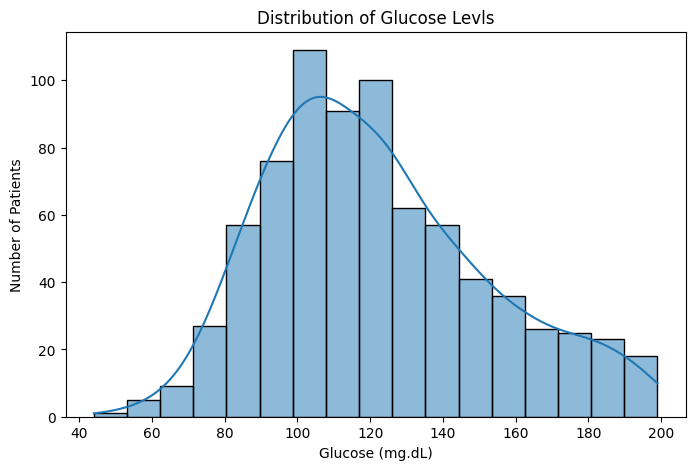

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["Glucose"], kde=True)
plt.title("Distribution of Glucose Levls")
plt.xlabel("Glucose (mg.dL)")
plt.ylabel("Number of Patients")

plt.savefig(r"C:\Users\Nono Nsele\Documents\Data_Analysis_Projects\Diabetes_Health_Data_Analysis_Python\images\glucose_distribution.png", bbox_inches="tight")
plt.show()


In [ ]:
**Glucose Distribution**

Glucose levels are right-skewed, with most obseravtions in normal to pre-diabetic ranges and a smaller concentration of very high values.

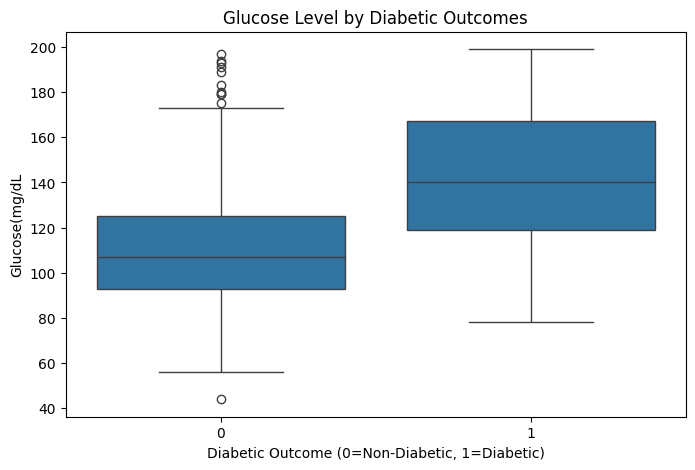

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot (x="Outcome", y="Glucose", data=df_clean)
plt.title("Glucose Level by Diabetic Outcomes")
plt.xlabel("Diabetic Outcome (0=Non-Diabetic, 1=Diabetic)")
plt.ylabel("Glucose(mg/dL")

plt.savefig(r"C:\Users\Nono Nsele\Documents\Data_Analysis_Projects\Diabetes_Health_Data_Analysis_Python\images\glucose_vs_outcome.png", bbox_inches="tight")
plt.show()

In [ ]:
** Glucose vs Diabetic Outcome**

Individuals with diabetes exhibit substantially higher median glucose levels, indicating a strong association between glucose concentration and disease presence.

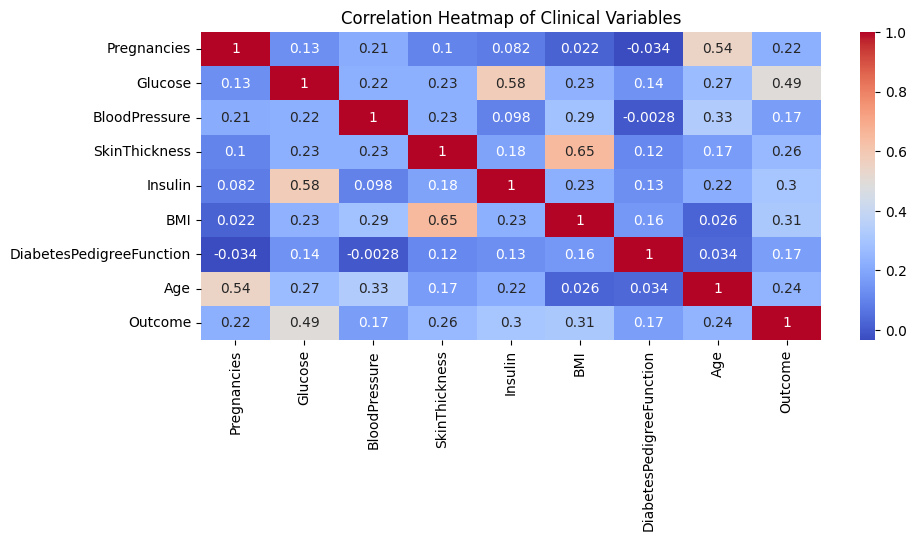

In [13]:
plt.figure(figsize=(10,4))
corr=df_clean.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Clinical Variables")

plt.savefig(r"C:\Users\Nono Nsele\Documents\Data_Analysis_Projects\Diabetes_Health_Data_Analysis_Python\images\correlation_heatmap.png", bbox_inches="tight")
plt.show()

In [ ]:
**Correlation Analysis**

Glucose shows the strongest positive correlation with Insulin followed by Diabetic Outcome.

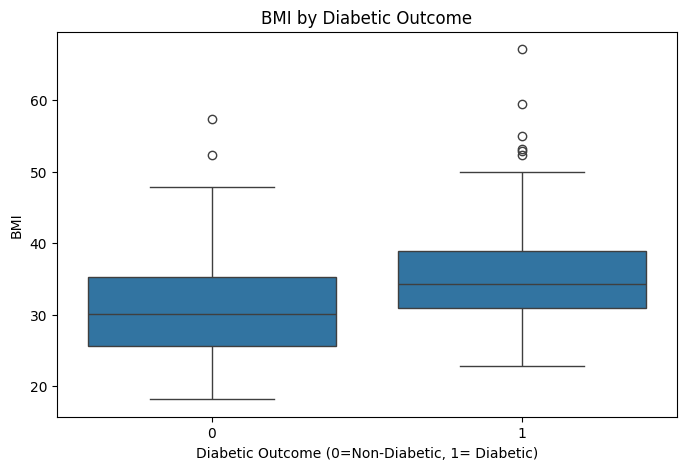

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="BMI", data=df_clean)
plt.title("BMI by Diabetic Outcome")
plt.xlabel("Diabetic Outcome (0=Non-Diabetic, 1= Diabetic)")
plt.ylabel("BMI")

plt.savefig(r"C:\Users\Nono Nsele\Documents\Data_Analysis_Projects\Diabetes_Health_Data_Analysis_Python\images\BMI_vs_Outcome.png", bbox_inches="tight")
plt.show()

In [ ]:
**BMI vs Diabetic Outcome**

Diabetes prevalence increases progressively across higher BMI categories, reinforcing as a significant risk factor. 
    

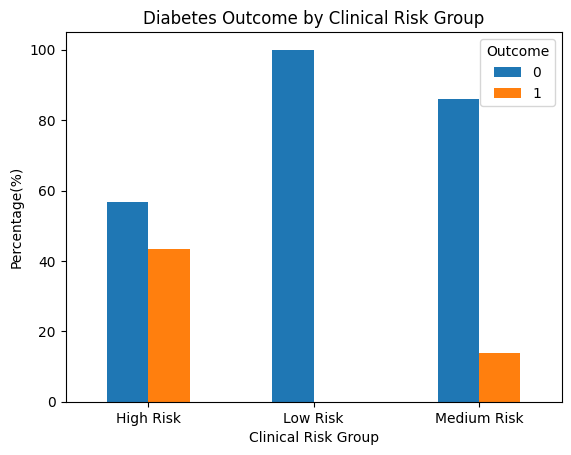

In [17]:
risk_outcome = pd.crosstab(df['Clinical_Risk_Group'], df['Outcome'], normalize ='index')*100

risk_outcome.plot (kind='bar')
plt.title('Diabetes Outcome by Clinical Risk Group')
plt.xlabel('Clinical Risk Group')
plt.ylabel('Percentage(%)')
plt.legend(title='Outcome')
plt.xticks(rotation=0)

plt.savefig(r"C:\Users\Nono Nsele\Documents\Data_Analysis_Projects\Diabetes_Health_Data_Analysis_Python\images\Risk_Group_vs_Outcome.png", bbox_inches="tight")
plt.show()

In [ ]:
**Clinical Risk Group vs Diabetic Outcome** 

Diabetes prevalence increase sharply cross low, medium, and high clinical risk groups, validating the effectiveness of composite risk stratification appraoch.

In [ ]:
## Summary Tables 

This section summarises diabetes prevalence across key engineered clinical categories using percentage-based tables.

In [66]:
Glucose_Summary = (
    df.groupby('glucose buckets')['Outcome']
    .mean()
    .mul(100)
    .reset_index()
    .rename(columns={'Outcome': 'Diabetic_Percentage'})
)

Glucose_Summary

C:\Users\Nono Nsele\AppData\Local\Temp\ipykernel_2380\1318228720.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('glucose buckets')['Outcome']


,glucose buckets,Diabetic_Percentage
0,Normal,8.612440
1,Prediabetic,28.015564
2,Diabetic,59.259259


In [ ]:
Diabetes prevalence increase substantially across high glucose categories.

In [77]:
BMI_Summary = (
    df.groupby('bmi_category')['Outcome']
    .mean()
    .mul(100)
    .reset_index()
    .rename(columns={'Outcome': 'Diabetic_Percentage'})
)

BMI_Summary

C:\Users\Nono Nsele\AppData\Local\Temp\ipykernel_2380\101876426.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bmi_category')['Outcome']


,bmi_category,Diabetic_Percentage
0,Underweight,0.000000
1,Normal,6.481481
2,Overweight,24.444444
3,Obese,46.236559


In [ ]:
Higher BMI categories show progressively higher diabetes prevalence. 

In [74]:
Risk_Summary = (
    df.groupby('Clinical_Risk_Group')['Outcome']
    .mean()
    .mul(100)
    .reset_index()
    .rename(columns={'Outcome': 'Diabetic_Percentage'})
)

Risk_Summary

,Clinical_Risk_Group,Diabetic_Percentage
0,High Risk,43.386243
1,Low Risk,0.000000
2,Medium Risk,13.924051


In [ ]:
Diabetes prevalence increase sharly across low, medium, and high clinical risk groups, supporting the validity of composit risk classification.

In [ ]:
## Key Insights

- Visual analysis of glucose distributions reveals a right-skewed pattern, with most individuals clustered in normal to prediabetic ranges and a smaller but pronounced tail at higher glucose levels. Box plots comparing glucose by diabetes outcome show a clear upward shift in median and interquartile range among diabetic individuals, visually reinforcing glucose as the most discriminative variable in the dataset. This pattern aligns with glucose dysregulation as a defining metabolic feature of diabetes.

- BMI demonstrates a graded relationship with diabetes outcome across both visualizations and summary tables. Bar plots of BMI category versus outcome show increasing diabetes prevalence as BMI moves from normal to overweight and obese categories. From a metabolic perspective, higher adiposity is associated with increased insulin resistance, which helps explain the progressive pattern observed in the data.

- Correlation analysis further supports these observations, with glucose exhibiting the strongest positive correlation with diabetes outcome, followed by BMI and age. While correlation does not imply causation, the consistency of these relationships across multiple analytical views suggests stable underlying associations rather than noise-driven effects.

- Blood pressure, when viewed independently, shows a weaker direct relationship with diabetes outcome. However, its inclusion in the composite clinical risk group meaningfully improves stratification. This reflects how elevated blood pressure often co-occurs with other metabolic abnormalities as part of broader cardiometabolic risk rather than acting as an isolated predictor.

- The engineered clinical risk group provides one of the clearest visual narratives in the analysis. Bar plots of diabetes outcome by risk group show a sharp, monotonic increase in diabetes prevalence from low to medium to high risk. This pattern demonstrates that cumulative metabolic burden—rather than any single variable—better captures real-world risk profiles.

- Medium-risk individuals represent a particularly important group within the dataset. Visuals and tables indicate that this group already exhibits elevated glucose, BMI, or blood pressure values that fall below high-risk thresholds but clearly deviate from normal ranges. Clinically, this reflects early metabolic dysregulation, where physiological changes are present even before overt disease classification.

- Across all visualizations, consistent patterns emerge: higher glucose concentrations, increased body mass, and compounded metabolic indicators align with higher diabetes prevalence. The convergence of histogram shapes, box plot separations, bar plot gradients, and summary tables strengthens confidence in the observed trends.

- Overall, the dataset portrays diabetes risk as a multifactorial and progressive process. Visual EDA highlights not only the presence of associations but also their structure—showing how risk accumulates gradually across measurable clinical dimensions rather than appearing abruptly at diagnostic thresholds.
